# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
## Summary Analysis

# The summary analysis is that the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). 
# There is no strong relationship between latitude and humidity. 
# There is no strong relationship between latitude and cloudiness. 
# There is no strong relationship between latitude and wind speed. 

In [61]:
# In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world 
# of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, 
# the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.


# Your first objective is to build a series of scatter plots to showcase the following relationships:

# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

# After each plot add a sentence or too explaining what the code is and analyzing.


# Your next objective is to run linear regression on each relationship, only this time separating them into 
# Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere 
# (less than 0 degrees latitude):

# Northern Hemisphere - Temperature (F) vs. Latitude
# Southern Hemisphere - Temperature (F) vs. Latitude
# Northern Hemisphere - Humidity (%) vs. Latitude
# Southern Hemisphere - Humidity (%) vs. Latitude
# Northern Hemisphere - Cloudiness (%) vs. Latitude
# Southern Hemisphere - Cloudiness (%) vs. Latitude
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
# Southern Hemisphere - Wind Speed (mph) vs. Latitude

# After each pair of plots explain what the linear regression is modelling such as any relationships 
# you notice and any other analysis you may have.


# Your final notebook must:

# Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
# Perform a weather check on each of the cities using a series of successive API calls.
# Include a print log of each city as it's being processed with the city number and city name.
# Save a CSV of all retrieved data and a PNG image for each scatter plot.

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [69]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

In [70]:
cities

['khandyga',
 'rikitea',
 'komsomolskiy',
 'trairi',
 'grand forks',
 'punta arenas',
 'careva cuprija',
 'broome',
 'bentiu',
 'bredasdorp',
 'kapaa',
 'moron',
 'cape town',
 'taclobo',
 'busselton',
 'acapulco',
 'bengkulu',
 'aykhal',
 'cedar city',
 'georgetown',
 'labuhan',
 'wulanhaote',
 'myitkyina',
 'mataura',
 'bima',
 'mahebourg',
 'novyy rogachik',
 'kizema',
 'chuy',
 'port elizabeth',
 'constitucion',
 'marystown',
 'bethel',
 'yar-sale',
 'san policarpo',
 'thompson',
 'coihaique',
 'hilo',
 'ushuaia',
 'hithadhoo',
 'moree',
 'albany',
 'khatanga',
 'east london',
 'sakakah',
 'pochutla',
 'luocheng',
 'mar del plata',
 'kalat',
 'kavieng',
 'jamestown',
 'kruisfontein',
 'saanen',
 'rawson',
 'saint-augustin',
 'longyearbyen',
 'letterkenny',
 'barentsburg',
 'cidreira',
 'kapit',
 'marapanim',
 'atuona',
 'rognan',
 'hofn',
 'trincomalee',
 'chokurdakh',
 'ojinaga',
 'karratha',
 'tiksi',
 'hobart',
 'touros',
 'roald',
 'ciras',
 'yerofey pavlovich',
 'coquimbo',
 '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [71]:
# Starting URL for Weather Map API Call
    # base url = "http://api.openweathermap.org/data/2.5/weather?"
    # units = "imperial"
    # query URL
        # url = base url + "appid=" + weather_api_key + "&units=" + units + "&q="

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [72]:
# Get weather data
print("------------------------------")
print("Data Retrieval Start")
print("------------------------------")

# Create city weather list: City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max Temp, Wind Speed
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind = []

# Create counters
set_count = 1
record_count = 1

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_count < 50:
        record_count += 1
    else:
        set_count += 1
        record_count = 0

    print('Processing record {} of set {} | {}'.format(record_count, set_count, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print("------------------------------")
print("Data Retrieval End")
print("------------------------------")

------------------------------
Data Retrieval Start
------------------------------
Processing record 2 of set 1 | khandyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 3 of set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 4 of set 1 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 5 of set 1 | trairi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 6 of set 1 | grand forks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 7 of set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 8 of set 1 | careva cuprija
http://api.openwe

Processing record 9 of set 2 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 10 of set 2 | kapit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 11 of set 2 | marapanim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 12 of set 2 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 13 of set 2 | rognan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 14 of set 2 | hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 15 of set 2 | trincomalee
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing rec

Processing record 16 of set 3 | katherine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 17 of set 3 | erenhot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 18 of set 3 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
City not found!
Processing record 19 of set 3 | shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 20 of set 3 | kampong thum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 21 of set 3 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
City not found!
Processing record 22 of set 3 | toledo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a

Processing record 23 of set 4 | sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 24 of set 4 | marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
City not found!
Processing record 25 of set 4 | west wendover
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 26 of set 4 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 27 of set 4 | middelburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 28 of set 4 | banda aceh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 29 of set 4 | upington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b0

Processing record 29 of set 5 | sherlovaya gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 30 of set 5 | dubti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 31 of set 5 | plouzane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 32 of set 5 | tuy hoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 33 of set 5 | madison heights
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 34 of set 5 | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 35 of set 5 | sangar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f

Processing record 37 of set 6 | tazmalt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 38 of set 6 | pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 39 of set 6 | lubao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 40 of set 6 | fayaoue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 41 of set 6 | bud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 42 of set 6 | faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 43 of set 6 | karaul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
City not found!
Process

Processing record 44 of set 7 | flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 45 of set 7 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 46 of set 7 | klyavlino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 47 of set 7 | cockburn town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 48 of set 7 | puri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 49 of set 7 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 50 of set 7 | boa vista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a802

Processing record 50 of set 8 | srivardhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 0 of set 9 | namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 1 of set 9 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 2 of set 9 | dakar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 3 of set 9 | port keats
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 4 of set 9 | krasnoselkup
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 5 of set 9 | guia lopes da laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a802

Processing record 6 of set 10 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 7 of set 10 | sackville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 8 of set 10 | vagur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 9 of set 10 | tiznit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 10 of set 10 | alexandria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 11 of set 10 | san rafael
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 12 of set 10 | nara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Pro

Processing record 12 of set 11 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
City not found!
Processing record 13 of set 11 | rania
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 14 of set 11 | beltinci
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 15 of set 11 | eyl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 16 of set 11 | hatillo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 17 of set 11 | kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 18 of set 11 | verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64

Processing record 19 of set 12 | botou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 20 of set 12 | dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 21 of set 12 | laurel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 22 of set 12 | lubango
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 23 of set 12 | cocobeach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 24 of set 12 | zhangjiakou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Processing record 25 of set 12 | arua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=31f1a456fa37b00ad31e64d42a8021f8
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [75]:
# Create the dataframe
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Temp          554
Lat           554
Lng           554
Wind Speed    554
dtype: int64

In [76]:
# Display the dataframe
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,khandyga,100,RU,1585632876,91,26.55,62.67,135.60,3.13
1,rikitea,18,PF,1585632795,75,78.28,-23.12,-134.97,4.25
2,komsomolskiy,100,UZ,1585632812,39,64.40,40.43,71.72,4.70
3,trairi,98,BR,1585633068,86,78.31,-3.28,-39.27,7.61
4,grand forks,1,US,1585632800,74,37.40,47.93,-97.03,6.93


In [83]:
# Export the weather_data into a csv
weather_data.to_csv(output_data_file, index_label="City_ID")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

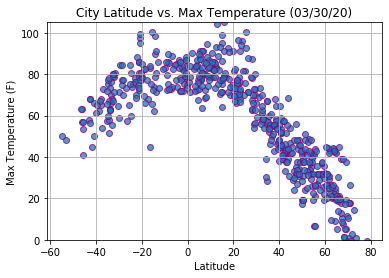

In [113]:
# Latitude Vs Temperature Plot
plt.scatter(weather_data["Lat"],weather_data["Temp"], marker="o", alpha=0.75, edgecolor="purple")
plt.title("City Latitude vs. Max Temperature (03/30/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(0,105)
plt.grid(True)

plt.savefig("output_data/Fig1LatvsTemp.png")
plt.show()

In [ ]:
# Explanation of the City Latitude vs. Max Temp scatter plot

# The City Latitude vs. Max Temp scatter plot demonstrates a negative, non-linear, moderately correlated 
# relationship between max temperature and latitude. The graph shows that in this non-linear relationship,
# there is a moderately close correlation between change in latitude and rise or fall of temperature.
# As the latitude goes from negative toward the equator, the temperature rises as well. However, on the other
# side of the equator, the correlate is a negative correlation, meaning as latitude increases, temperature
# decreases.

#### Latitude vs. Humidity Plot

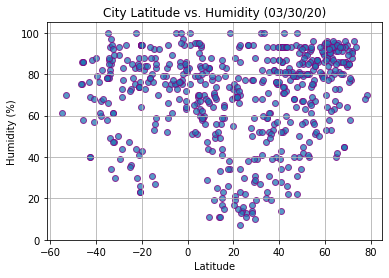

In [114]:
# Latitude Vs Humidity Plot
plt.scatter(weather_data["Lat"],weather_data["Humidity"], marker="o", alpha=0.75, edgecolor="purple")
plt.title("City Latitude vs. Humidity (03/30/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,105)
plt.grid(True)

plt.savefig("output_data/Fig2LatvsHumidity.png")
plt.show()

In [ ]:
# Explanation of the City Latitude vs. Humidity scatter plot

# The City Latitude vs. Humidity scatter plot demonstrates no correlation between humidity and latitude.

#### Latitude vs. Cloudiness Plot

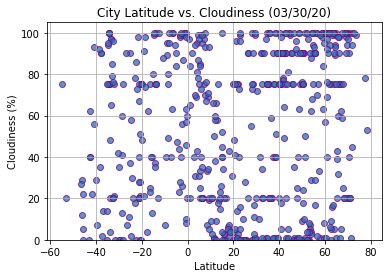

In [115]:
# Latitude Vs Cloudiness Plot
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"], marker="o", alpha=0.75, edgecolor="purple")
plt.title("City Latitude vs. Cloudiness (03/30/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0,105)
plt.grid(True)

plt.savefig("output_data/Fig3LatvsCloudiness.png")
plt.show()

In [ ]:
# Explanation of the City Latitude vs. Cloudiness scatter plot

# The City Latitude vs. Cloudiness scatter plot demonstrates no correlation between cloudiness and latitude.

#### Latitude vs. Wind Speed Plot

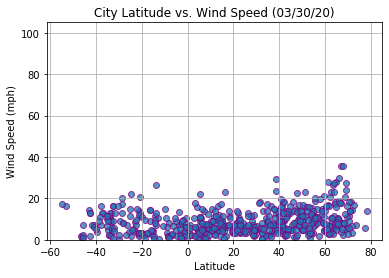

In [116]:
# Latitude Vs Wind Speed Plot
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"], marker="o", alpha=0.75, edgecolor="purple")
plt.title("City Latitude vs. Wind Speed (03/30/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,105)
plt.grid(True)

plt.savefig("output_data/Fig4LatvsWind.png")
plt.show()

In [ ]:
# Explanation of the City Latitude vs. Wind Speed scatter plot

# The City Latitude vs. Wind Speed scatter plot also demonstrates no correlation between wind speed and latitude.

## Linear Regression

In [125]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [131]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem_df = weather_data.loc[(weather_data["Lat"] >= 0)]
southern_hem_df = weather_data.loc[(weather_data["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9080764061028023


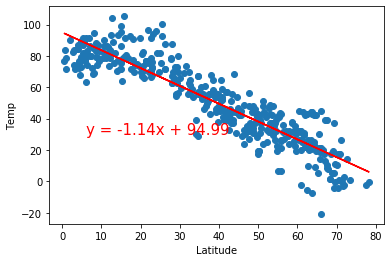

In [132]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Temp"]
plot_linear_regression(x_values, y_values, 'Temp',(6,30))

In [ ]:
# Explanation of the Northern Hemisphere - Max Temp vs. Latitude Linear Regression

# In the Northern Hemisphere, there is a strong negative correlation showing that as latitude increases, 
# the max temperature decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6161405941776598


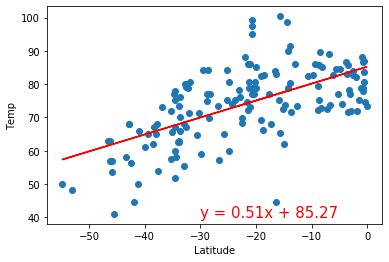

In [134]:
# Linear regression on Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Temp"]
plot_linear_regression(x_values, y_values, 'Temp', (-30,40))

In [ ]:
# Explanation of the Southern Hemisphere - Max Temp vs. Latitude Linear Regression

# In the Southern Hemisphere, there is a moderate positive correlation showing that as latitude increases
# the max. temperature also increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3253146405666418


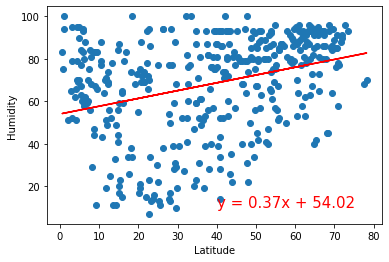

In [135]:
# Northern Hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

In [ ]:
# Explanation of the Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# In the Northern Hemisphere, there is very little correlation between latitude change and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14623642726282607


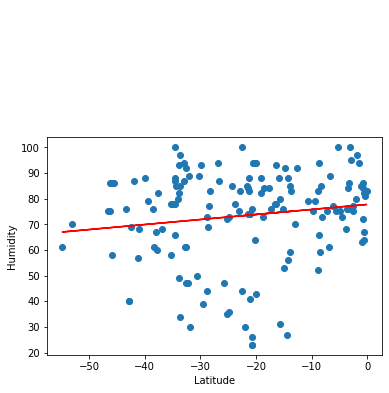

In [136]:
# Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

In [ ]:
# Explanation of the Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# In the Southern Hemisphere, there is also very little correlation between latitude change and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20022667663691457


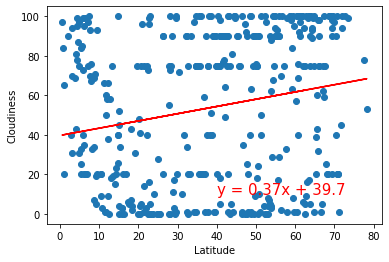

In [137]:
# Northern Hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2494457365624302


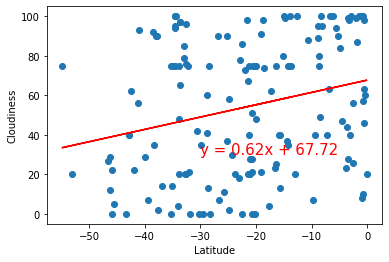

In [138]:
# Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

In [ ]:
# Explanation of the Northern and Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# In both the Southern and Northern Hemisphere, there is very little correlation between latitude change and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.3040412935982374


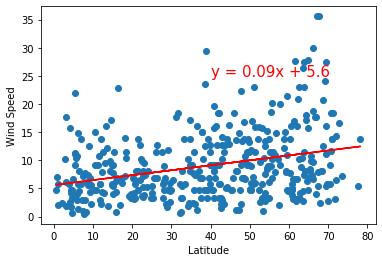

In [139]:
# Northern Hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.20930631256052554


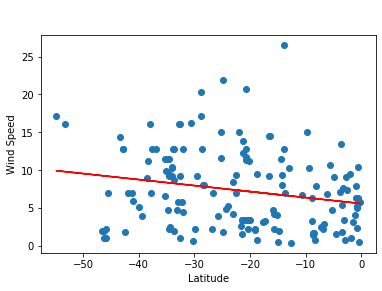

In [140]:
# Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))

In [ ]:
# Explanation of the Northern and Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

# In both the Northern and Southern Hemispheres, there is very little correclation between the effect of latitude
# change on wind speed. However, the direction of the correlation is positive in the northern hemisphere and negative
# in the Southern Hemisphere.
